In [ ]:
# Loading Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import kaggle

OSError: ignored

In [ ]:
! mv kaggle.json /root/.kaggle/

In [ ]:
import kaggle

In [ ]:
! kaggle competitions download -c titanic # Downloading dataset

401 - Unauthorized


In [ ]:
! unzip -q titanic.zip

unzip:  cannot find or open titanic.zip, titanic.zip.zip or titanic.zip.ZIP.


In [ ]:
# Reading train file
titanic=pd.read_csv('/content/titanic.csv', na_values=['',',',' ','-','.','?'])

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [ ]:
# Checking number of null values in train dataset
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
titanic.sample(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
613,0,3,male,NaN,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
620,0,3,male,27.0,1,0,14.4542,C,Third,man,True,NaN,Cherbourg,no,False


In [ ]:
# Checking duplicates in train dataset
titanic[titanic.duplicated()==True].shape[0]

107

In [ ]:
titanic=titanic.drop_duplicates()

In [ ]:
titanic.reset_index(drop=True,inplace=True)

In [ ]:
titanic.shape

(784, 15)

In [ ]:
# Extracting Object and Numeric type columns
cat_column=np.array(titanic.select_dtypes(include=['object']).columns)
num_column=np.array(titanic.select_dtypes(exclude=['object']).columns)

In [ ]:
print(num_column)
print(cat_column)

['survived' 'pclass' 'age' 'sibsp' 'parch' 'fare' 'adult_male' 'alone']
['sex' 'embarked' 'class' 'who' 'deck' 'embark_town' 'alive']


# EDA

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


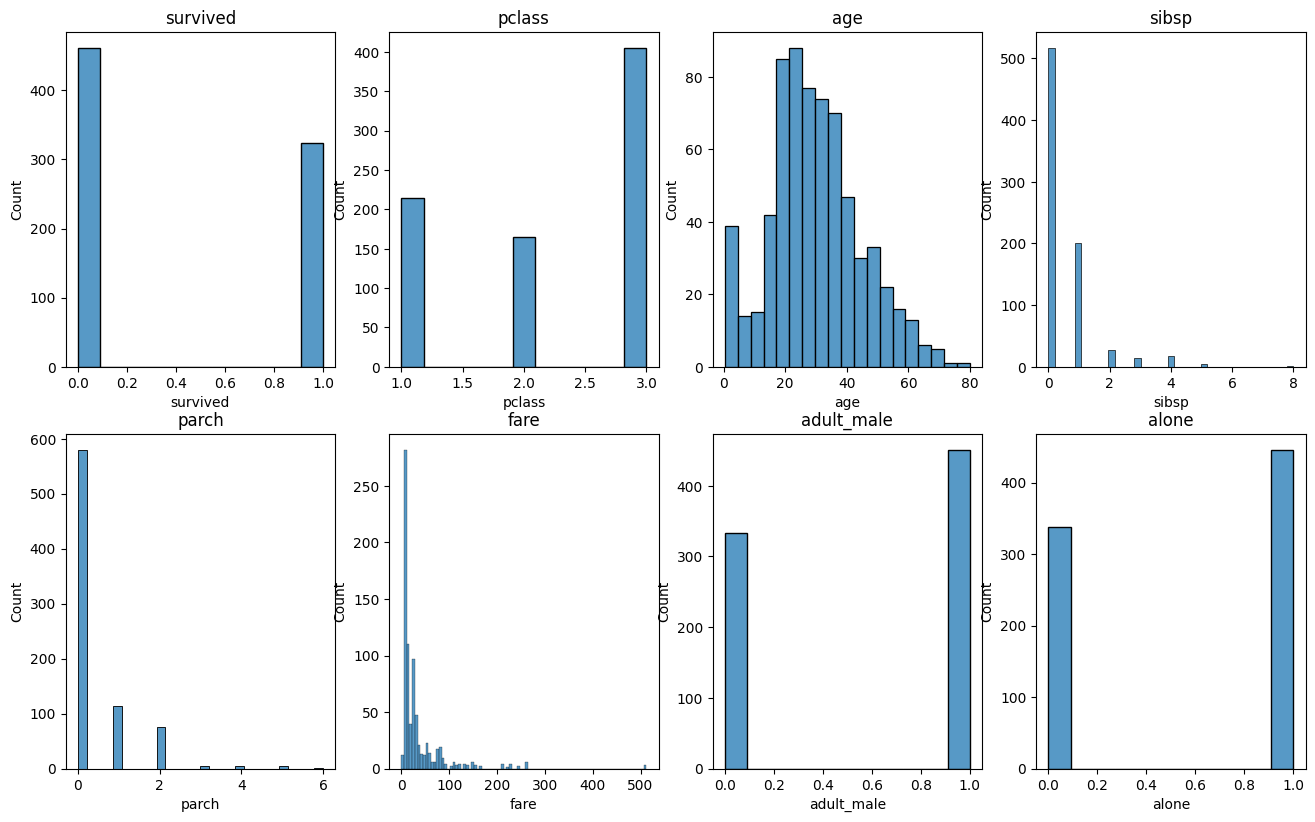

In [ ]:
# Histogram plot of all numerical features
plt.figure(figsize=(16,20))
for i,v in enumerate(num_column):
  plt.subplot(4,4,i+1)
  sns.histplot(titanic[v])
  plt.title(v)


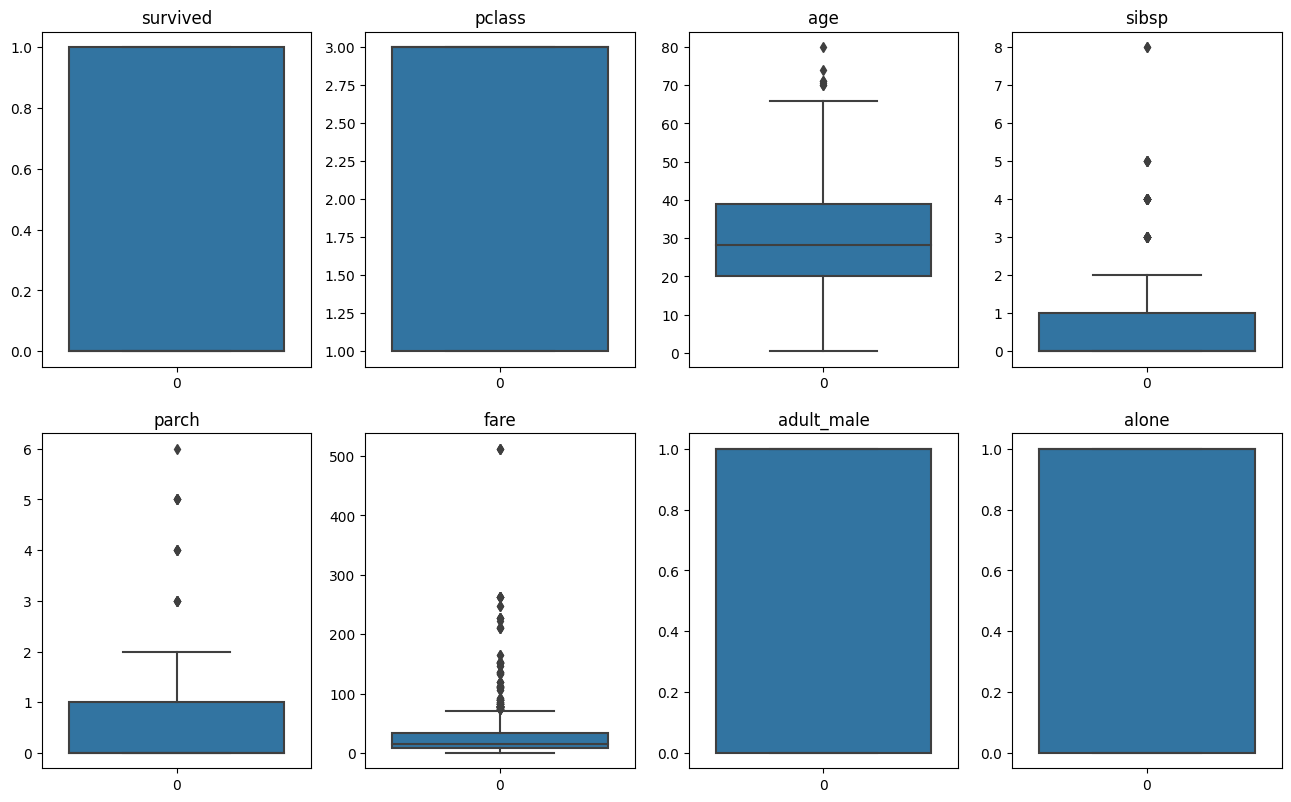

In [ ]:
# Boxplot
plt.figure(figsize=(16,20))
for i,v in enumerate(num_column):
  plt.subplot(4,4,i+1)
  sns.boxplot(titanic[v])
  plt.title(v)

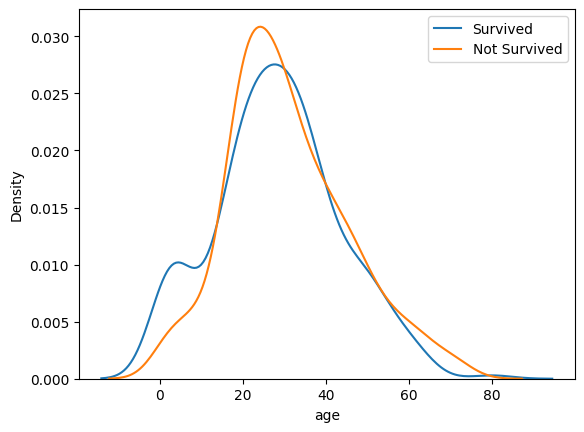

In [ ]:
sns.kdeplot(titanic[titanic['survived']==1]['age'],label='Survived')
sns.kdeplot(titanic[titanic['survived']==0]['age'],label='Not Survived')
plt.legend()
plt.show()

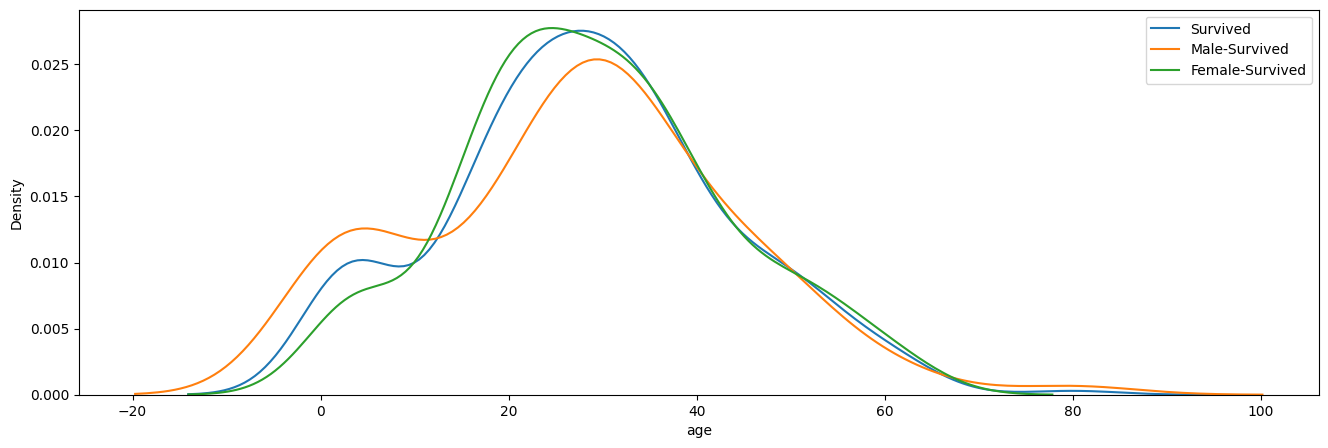

In [ ]:
plt.figure(figsize=(16,5))
sns.kdeplot(titanic[titanic['survived']==1]['age'],label='Survived')
sns.kdeplot(titanic[(titanic['survived']==1) & (titanic['sex']=='male')]['age'],label='Male-Survived')
sns.kdeplot(titanic[(titanic['survived']==1) & (titanic['sex']=='female')]['age'],label='Female-Survived')
plt.legend()
plt.show()

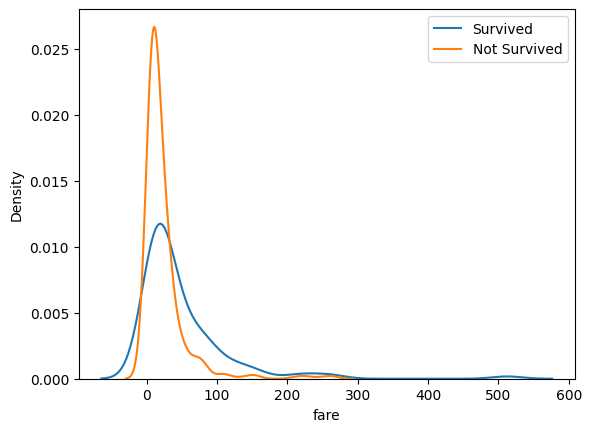

In [ ]:
sns.kdeplot(titanic[titanic['survived']==1]['fare'],label='Survived')
sns.kdeplot(titanic[titanic['survived']==0]['fare'],label='Not Survived')
plt.legend()
plt.show()

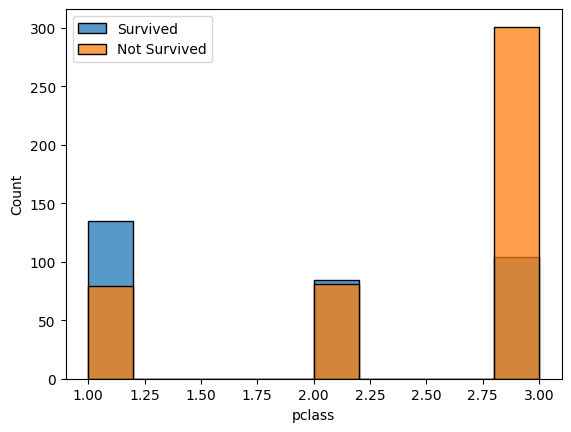

In [ ]:
sns.histplot(titanic[titanic['survived']==1]['pclass'],label='Survived')
sns.histplot(titanic[titanic['survived']==0]['pclass'],label='Not Survived')
plt.legend()
plt.show()

<Axes: xlabel='embarked', ylabel='fare'>

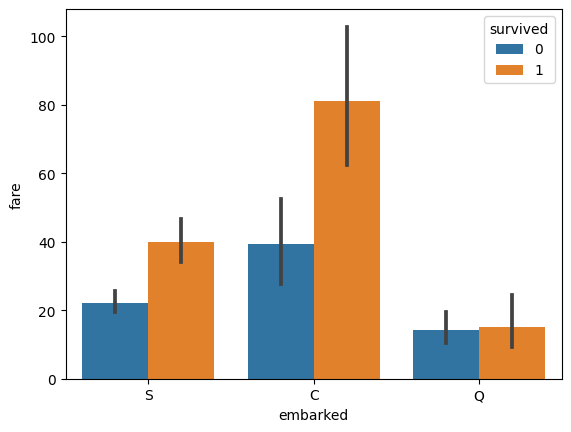

In [ ]:
sns.barplot(x=titanic['embarked'],y=titanic['fare'],hue=titanic['survived'])

# Feature Engineering

In [ ]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.drop(['embarked','pclass','sibsp','parch','alive','who','adult_male'],axis=1,inplace=True)

In [ ]:
titanic.head(4)

,survived,sex,age,fare,class,deck,embark_town,alone
0,0,male,22.0,7.2500,Third,NaN,Southampton,False
1,1,female,38.0,71.2833,First,C,Cherbourg,False
2,1,female,26.0,7.9250,Third,NaN,Southampton,True
3,1,female,35.0,53.1000,First,C,Southampton,False


In [ ]:
titanic.groupby('deck').mean()['fare']

In [ ]:
titanic.groupby('deck').count()

In [ ]:
# splitting test data.
from sklearn.model_selection import train_test_split
col=titanic.columns
x=titanic.iloc[:,1:]
y=titanic.iloc[:,0]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)
print(x.shape,y.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(784, 7) (784,)
(627, 7) (627,)
(157, 7) (157,)


In [ ]:
type(y_test)

pandas.core.series.Series

In [ ]:
x_train.isna().sum()

sex              0
age             87
fare             0
class            0
deck           468
embark_town      2
alone            0
dtype: int64

In [ ]:
# Feature engineering to be done
# 1. Missing value treatment in age, embark_town & deck.
# 2. Checking and handling outliers.
# 3. Scaling numerical values.
# 4. Ordinal encoding class.
# 5. OHE deck, embark_town, sex and alone.

In [ ]:
# Replacing null values

# Replcaing null values in Age by median value.
# Replacing null values in embark_town by mode value.
# Replacing null values in deck by 'missing'.

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
ct=ColumnTransformer(transformers=[('trf1',SimpleImputer(strategy='median'),['age']),
                                   ('trf2',SimpleImputer(strategy='constant',fill_value='missing'),['deck']),
                                   ('trf3',SimpleImputer(strategy='most_frequent'),['embark_town'])],
                     remainder='passthrough')

In [ ]:
ct.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('trf1', SimpleImputer(strategy='median'),
                                 ['age']),
                                ('trf2',
                                 SimpleImputer(fill_value='missing',
                                               strategy='constant'),
                                 ['deck']),
                                ('trf3',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['embark_town'])])

In [ ]:
x_train_ct=ct.transform(x_train)
x_test_ct=ct.transform(x_test)

In [ ]:
x_train_ct=pd.DataFrame(x_train_ct,columns=['age','deck','embark_town','sex','fare','class','alone'])
x_test_ct=pd.DataFrame(x_test_ct,columns=['age','deck','embark_town','sex','fare','class','alone'])

In [ ]:
x_train_ct.dtypes

age            object
deck           object
embark_town    object
sex            object
fare           object
class          object
alone          object
dtype: object

In [ ]:
x_train_ct=x_train_ct.astype(dtype={'age':float,'fare':float})

In [ ]:
x_train_ct.dtypes

age            float64
deck            object
embark_town     object
sex             object
fare           float64
class           object
alone           object
dtype: object

In [ ]:
x_train_ct.head(4)

,age,deck,embark_town,sex,fare,class,alone
0,70.5,missing,Queenstown,male,7.75,Third,True
1,35.0,missing,Cherbourg,female,512.3292,First,True
2,18.0,missing,Southampton,female,13.0,Second,False
3,47.0,C,Southampton,male,52.0,First,True


In [ ]:
x_train_ct[x_train_ct['fare']>u+(2*iqr)].shape[0]

48

In [ ]:
x_test_ct.sample(4)

,age,deck,embark_town,sex,fare,class,alone
156,25.0,missing,Southampton,male,7.05,Third,True
111,28.0,missing,Southampton,male,0.0,Second,True
106,2.0,C,Southampton,female,151.55,First,False
48,28.0,missing,Queenstown,female,7.75,Third,True


In [ ]:
# Handling outliers
num_columns=np.array(x_train_ct.select_dtypes(exclude=['object']).columns)

In [ ]:
num_columns

array(['age', 'fare'], dtype=object)

In [ ]:
# There are two numerical columns, age and fare. Both are right skewed thus using limit+-1.5*IQR to cap outliers
def handle_outlier(dataset):
  for v in num_columns:

    ul=x_train_ct[v].quantile(0.75)
    ll=x_train_ct[v].quantile(0.25)
    IQR=ul-ll

    for l in range(dataset.shape[0]):
      if dataset.loc[l,v] > ul+(2*IQR):
        dataset.loc[l,v] = ul+(2*IQR)
      elif  dataset.loc[l,v] < ll-(2*IQR):
        dataset.loc[l,v] = ll-(2*IQR)

  return dataset

In [ ]:
x_train_ct.describe()

,age,fare
count,627.000000,627.000000
mean,29.282169,33.562028
std,13.644410,48.673442
min,0.420000,0.000000
25%,21.000000,8.050000
50%,28.000000,15.850000
75%,36.000000,34.197900
max,80.000000,512.329200


In [ ]:
# Outlier handling for training dataset
handle_outlier(x_train_ct)

In [ ]:
# After handling outliers in training data
x_train_ct.describe()

,age,fare
count,627.000000,627.000000
mean,29.225550,27.759366
std,13.471788,25.644953
min,0.420000,0.000000
25%,21.000000,8.050000
50%,28.000000,15.850000
75%,36.000000,34.197900
max,66.000000,86.493700


In [ ]:
x_train_ct[x_train_ct['fare']>u+(2*iqr)].shape[0]

0

In [ ]:
# Outlier handling for testing dataset
x_test_ct=x_test_ct.astype(dtype={'age':float,'fare':float})

In [ ]:
x_test_ct.dtypes

age            float64
deck            object
embark_town     object
sex             object
fare           float64
class           object
alone           object
dtype: object

In [ ]:
# testing data statistics before handling outliers
x_test_ct.describe()

,age,fare
count,157.000000,157.000000
mean,30.952229,39.303264
std,14.073728,64.205986
min,2.000000,0.000000
25%,23.000000,8.050000
50%,28.000000,16.100000
75%,39.000000,33.500000
max,71.000000,512.329200


In [ ]:
# Handling outliers for testing data
handle_outlier(x_test_ct)

,age,deck,embark_town,sex,fare,class,alone
0,47.0,D,Southampton,female,52.5542,First,False
1,33.0,B,Southampton,male,5.0000,First,True
2,24.0,missing,Southampton,male,16.1000,Third,False
3,22.0,missing,Southampton,male,7.7958,Third,True
4,28.0,missing,Southampton,male,7.8958,Third,True
...,...,...,...,...,...,...,...
152,28.0,missing,Cherbourg,male,7.2292,Third,True
153,28.0,C,Southampton,male,35.0000,First,True
154,28.0,missing,Cherbourg,female,14.4583,Third,False
155,54.0,D,Cherbourg,female,78.2667,First,False


In [ ]:
# testing data statistics after handling outliers
x_test_ct.describe()

,age,fare
count,157.000000,157.000000
mean,30.894904,28.266608
std,13.919760,26.033163
min,2.000000,0.000000
25%,23.000000,8.050000
50%,28.000000,16.100000
75%,39.000000,33.500000
max,66.000000,86.493700


In [ ]:
# scaling numerical values
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [ ]:
x_train_ct['class'].value_counts()

Third     328
First     167
Second    132
Name: class, dtype: int64

In [ ]:
ct1=ColumnTransformer(transformers=[('trf1',RobustScaler(),['age','fare']),
                                    ('trf2',OrdinalEncoder(categories=[['Third','Second','First']],handle_unknown='use_encoded_value', unknown_value=3),['class']),
                                    ('trf3',OneHotEncoder(drop='first',handle_unknown='ignore'),['deck','embark_town','sex','alone'])],
                      remainder='passthrough')

In [ ]:
x_train_ct.columns

Index(['age', 'deck', 'embark_town', 'sex', 'fare', 'class', 'alone'], dtype='object')

In [ ]:
x_train_ct.head(5)

,age,deck,embark_town,sex,fare,class,alone
0,66.0,missing,Queenstown,male,7.7500,Third,True
1,35.0,missing,Cherbourg,female,86.4937,First,True
2,18.0,missing,Southampton,female,13.0000,Second,False
3,47.0,C,Southampton,male,52.0000,First,True
4,36.0,C,Southampton,male,78.8500,First,False


In [ ]:
ct1.fit(x_train_ct)

ColumnTransformer(remainder='passthrough',
                  transformers=[('trf1', RobustScaler(), ['age', 'fare']),
                                ('trf2',
                                 OrdinalEncoder(categories=[['Third', 'Second',
                                                             'First']],
                                                handle_unknown='use_encoded_value',
                                                unknown_value=3),
                                 ['class']),
                                ('trf3',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['deck', 'embark_town', 'sex', 'alone'])])

In [ ]:
x_train_final=ct1.transform(x_train_ct)
x_test_final=ct1.transform(x_test_ct)

In [ ]:
x_train_final.shape

(627, 14)

In [ ]:
type(x_train_final)

numpy.ndarray

In [ ]:
x_train_final[0:10,:]

array([[ 2.53333333e+00, -3.09776311e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  1.00000000e+00],
       [ 4.66666667e-01,  2.70169689e+00,  2.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00],
       [-6.66666667e-01, -1.08995369e-01,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 1.26666667e+00,  1.38252020e+00,  2.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.

In [ ]:
x_test_final.shape

(157, 14)

In [ ]:
# Importing Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
model.fit(x_train_final,y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(x_test_final)

In [ ]:
from sklearn.metrics import *

In [ ]:
accuracy_score(y_test,y_pred)

0.7579617834394905

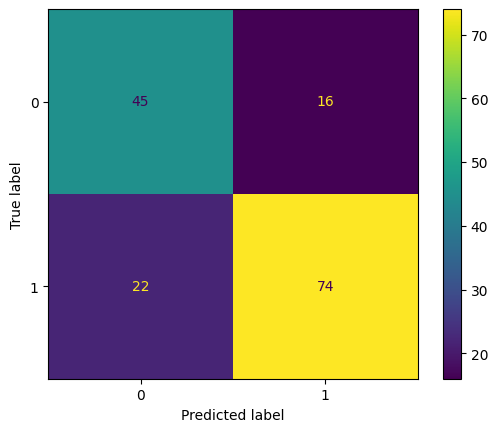

In [ ]:
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred,labels=[1,0]))
disp.plot()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80        96
           1       0.67      0.74      0.70        61

    accuracy                           0.76       157
   macro avg       0.75      0.75      0.75       157
weighted avg       0.76      0.76      0.76       157



In [ ]:
df=pd.DataFrame(x_train_final)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2.533333,-0.309776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
1,0.466667,2.701697,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.666667,-0.108995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.266667,1.382520,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.533333,2.409371,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
df[14]=y_train.values

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2.533333,-0.309776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0
1,0.466667,2.701697,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
2,-0.666667,-0.108995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
3,1.266667,1.382520,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0
4,0.533333,2.409371,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0


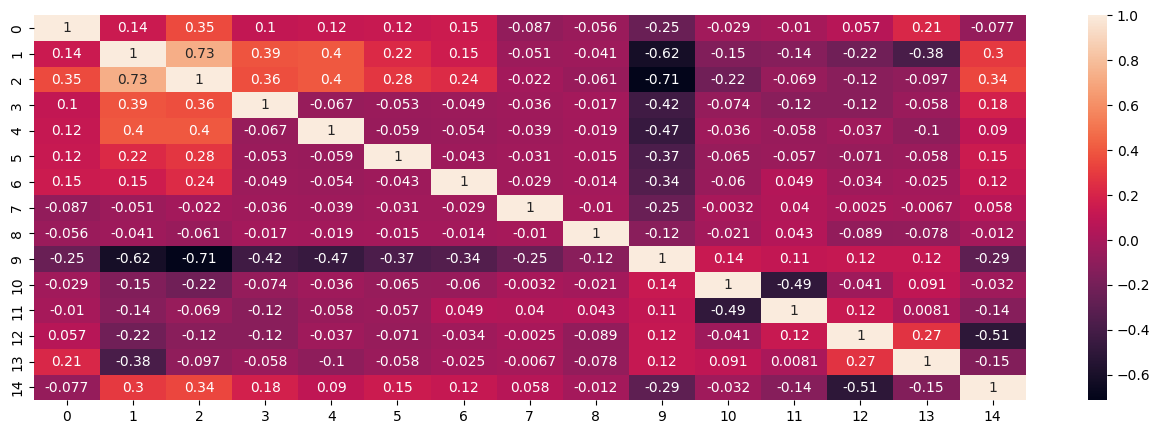

In [ ]:
plt.figure(figsize=(16,5))
sns.heatmap(df.corr(),annot=True)
plt.show()